#UAS Daffa Rizki Rizaly - 2301931251
Fashion Mnist Dataset

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

* **tensorflow** sebagai library machine learning yang digunakan untuk mengakses keras.
* **keras** merupakan API untuk deep learning.
* **Sequential** adalah tipe model yang digunakan karena hanya memiliki 1 input tensor dan 1 output tensor.
* **Conv1D** digunakan untuk membuat layer convulutional 1D. Pada dataset ini , saya menggunakan 1D karena dataset merupakan data 1D
* **MaxPooling1D** digunakan untuk mengurangi dimensi feature map tanpa menghilang bagian paling penting.
* **Dense** menambahkan layer yang terkonek dengan erat
* **Flatten** digunakan untuk mengubah 2dimensional menjadi 1 linear vector.
* **Dropout** digunakan untuk mengdrop sebuah random neuron,'
* **Adam** adalah optimizer yang saya gunakan karena memiliki performa yang terbaik.

* **train_test_split** digunakan untuk splitting data ke validation set
* **PCA** digunakan sebagai library untuk melakukan pca dan pengurangan dimensi gambar
* **StandardScaler** digunakan untuk normalisasi data features untuk memperbagus hasil.




## Import Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Dataset Preprocessing

In [ ]:
#Normalize Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Split Dataset for Validation
X_train, X_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
#Reshape features 
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1) #Ubah shape menjadi 4d untuk dapat dimasukan ke CNN

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


## **Build the model**

Pada bagian ini kita akan mengkonfigurasi 2 cnn model kita. 

In [ ]:
#Pada bagian ini, saya membuat 2 model layer.
name = '1_Layer'
cnn_model_1 = Sequential([
    #Menambahkan layer convulational 2D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.                      
    Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),

    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 32 yang terhubung ketat.
    Dense(32, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 10 yaitu jumlah label yang terhubung ketat.
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    #Menambahkan layer convulational 2D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),
    
    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling2D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout-1'),

    #Menambahkan layer convulational 2D dengan 64 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.25, name='Dropout-2'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 64 yang terhubung ketat.
    Dense(64, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 10 yaitu jumlah label yang terhubung ketat.
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_PCA_models = [cnn_model_1, cnn_model_2]

In [ ]:
#Melihat summary

for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________

In [ ]:
#Training Model dan menyimpan di history

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=300,
        epochs=50, verbose=1,
        validation_data=(X_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
160/160 [==============================] - 44s 9ms/step - loss: 1.0150 - accuracy: 0.6843 - val_loss: 0.4387 - val_accuracy: 0.8465
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 0.4135 - accuracy: 0.8551 - val_loss: 0.3611 - val_accuracy: 0.8737
Epoch 3/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.8785 - val_loss: 0.3242 - val_accuracy: 0.8847
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.3207 - accuracy: 0.8873 - val_loss: 0.3110 - val_accuracy: 0.8919
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 0.2953 - accuracy: 0.8982 - val_loss: 0.3049 - val_accuracy: 0.8913
Epoch 6/50
160/160 [==============================] - 1s 6ms/step - loss: 0.2828 - accuracy: 0.8999 - val_loss: 0.2880 - val_accuracy: 0.8977
Epoch 7/50
160/160 [==============================] - 1s 6ms/step - loss: 0.2743 - accuracy: 0.9035 - val_loss: 0.2845 - val_accuracy: 0.8954
Epoch

In [ ]:
#Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.29529786109924316
Test accuracy: 92.23999977111816


Model CNN dengan fashion mnist ini melakukan kerja yang baik dengan accuracy 92.23, dan test loss 0.29. Hasil yang memuaskan ini pastinya karena konfigurasi CNN, normalisasi data, dan pengaturan epoch dan batch learning.

#PCA + CNN

In [ ]:
#Reshape Menjadi 2D untuk dimasukan ke PCA
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
X_validate = X_validate.reshape(X_validate.shape[0], 784)

In [ ]:
#PCA mengurangi dimensi dari input oleh karena itu kita akan mengubah dari 28x28 menjadi 20x20 maka n_component akan kita setting ke 400
pca = PCA(n_components=400)
pca = pca.fit(X_train)
X_train = pca.transform(X_train)


pca = PCA(n_components=400)
pca = pca.fit(X_test)
X_test = pca.transform(X_test)



pca = PCA(n_components=400)
pca = pca.fit(X_validate)
X_validate = pca.transform(X_validate)


In [ ]:
#Reshape features 
image_rows = 20
image_cols = 20
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 20, 20, 1)
x_test shape: (10000, 20, 20, 1)
x_validate shape: (12000, 20, 20, 1)


Pada bagian ini kita akan mengkonfigurasi 2 cnn model kita. 

In [ ]:
#Pada bagian ini, saya membuat 2 model layer.
name = '1_Layer'
cnn_model_1 = Sequential([
    #Menambahkan layer convulational 2D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.                      
    Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),

    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling1D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 32 yang terhubung ketat.
    Dense(32, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 10 yaitu jumlah label yang terhubung ketat.
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    #Menambahkan layer convulational 2D dengan 32 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape, name='Conv2D-1'),
    
    #Mengurangi dimensional tanpa menghilangkan bagian paling penting dengan size 2*2 
    MaxPooling2D(pool_size=2, name='MaxPool'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.2, name='Dropout-1'),

    #Menambahkan layer convulational 2D dengan 64 filter , kernel size 3*3 dengan activation relu sebagai default.
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),

    #Mengdrop random neuron untuk mencegah overfitting.
    Dropout(0.25, name='Dropout-2'),

    #Meratakan 2d menjadi 1 linear vector
    Flatten(name='flatten'),

    #Menambahkan layer dengan ukuran 64 yang terhubung ketat.
    Dense(64, activation='relu', name='Dense'),

    #Menambahkan layer dengan ukuran 10 yaitu jumlah label yang terhubung ketat.
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_PCA_models = [cnn_model_1, cnn_model_2]

In [ ]:
#Melihat summary

for model in cnn_PCA_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 18, 18, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 9, 9, 32)          0         
_________________________________________________________________
Dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                82976     
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 83,626
Trainable params: 83,626
Non-trainable params: 0
_______________________________________________________

In [ ]:
#Training Model dan menyimpan di history

history_dict = {}

for model in cnn_PCA_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        batch_size=300,
        epochs=50, verbose=1,
        validation_data=(X_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
160/160 [==============================] - 2s 7ms/step - loss: 1.6857 - accuracy: 0.5106 - val_loss: 1.0119 - val_accuracy: 0.6470
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 0.6114 - accuracy: 0.7935 - val_loss: 1.0115 - val_accuracy: 0.6526
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5153 - accuracy: 0.8232 - val_loss: 1.0455 - val_accuracy: 0.6568
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4818 - accuracy: 0.8323 - val_loss: 1.0609 - val_accuracy: 0.6530
Epoch 5/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.8472 - val_loss: 1.0732 - val_accuracy: 0.6528
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.8455 - val_loss: 1.0862 - val_accuracy: 0.6456
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4277 - accuracy: 0.8526 - val_loss: 1.1125 - val_accuracy: 0.6378
Epoch 

In [ ]:
#Evaluasi
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 1.050186276435852
Test accuracy: 68.33000183105469


Model PCA+CNN saya menghasilkan accuracy 68.33% dengan loss 1. Hasilnya kurang optimal dan dapat dikembangkan dengan memperbanyak training set,mengatur konfigurasi model,mengatur batch learning dan mengatur epoch untuk menghasilkan hasil yang optimal. Untuk PCA+CNN ini , n_components PCA juga pastinya berpengaruh. 

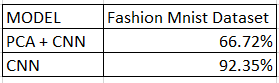

Terlihat pada tabel diatas, CNN mengungguli dibanding dengan PCA+CNN. PCA+CNN mendapatkan hasil 66.72%. Sedangkan CNN mendapatkan hasil 92.35%. Model CNN dapat ditingkatkan dengan mengubah konfigurasi CNNnya dan juga mengatur jumlah Batch Learning dan epoch. Sedangkan MOdel PCA+CNN juga sama tapi juga terpengaruhi oleh n_componentsnya. Dengan mengubah dimensi gambar fashion 28x28 ke 20 x20 akan mengurangi variabel yang berkorelasi. PCA sendiri sudah menyederhanakan data dan dapat mengurangi redudansi menjadi data dengan varian yang lebih maksimal, yaitu yang awalnya variable nya berkolerasi, menjadi variable yang bebas atau tidak berkolerasi sehingga hasil kurang bagus. 